# Table of Contents
* [1. Session 2](#1.-Session-2)
* [2. My solution to the challenge from Session 1](#2.-My-solution-to-the-challenge-from-Session-1)
	* [2.1 Command line arguments](#2.1-Command-line-arguments)
* [3. Other useful standard library modules](#3.-Other-useful-standard-library-modules)
	* [3.1 `time` and `datetime`](#3.1-time-and-datetime)
	* [3.2 `argparse`](#3.2-argparse)
	* [3.3 `glob`](#3.3-glob)
	* [3.4 `subprocess`](#3.4-subprocess)
* [4. More `numpy`](#4.-More-numpy)
	* [4.1 Copies vs. references](#4.1-Copies-vs.-references)
	* [4.2 Sorting arrays](#4.2-Sorting-arrays)
	* [4.3 Concatenating, stacking and splitting](#4.3-Concatenating,-stacking-and-splitting)
	* [4.4 Creating arrays, repeat, reshape](#4.4-Creating-arrays,-repeat,-reshape)
	* [4.5 Record arrays (recarrays)](#4.5-Record-arrays-%28recarrays%29)
	* [4.6 Logical masks and crazy floating point values (`nan` and `inf`)](#4.6-Logical-masks-and-crazy-floating-point-values-%28nan-and-inf%29)
	* [4.7 `numpy.where` with 2d arrays](#4.7-numpy.where-with-2d-arrays)
	* [4.8 Unique values](#4.8-Unique-values)
	* [4.9 Finding locations of specific values in arrays](#4.9-Finding-locations-of-specific-values-in-arrays)
* [5. More matplotlib](#5.-More-matplotlib)
	* [5.1 Histograms](#5.1-Histograms)
	* [5.2 Legends](#5.2-Legends)
	* [5.3 Grids of plots](#5.3-Grids-of-plots)
	* [5.4 Fill Between](#5.4-Fill-Between)
* [6. Scipy](#6.-Scipy)
	* &nbsp;
		* &nbsp;
			* [6.0.0.1 Finding neighbours with KD Trees](#6.0.0.1-Finding-neighbours-with-KD-Trees)
			* [6.0.0.2 Interpolating](#6.0.0.2-Interpolating)
			* [6.0.0.3 Integration](#6.0.0.3-Integration)
* [7. Astropy](#7.-Astropy)
* [8. Challenges](#8.-Challenges)
	* [8.1 Write a simple 'particle data' package](#8.1-Write-a-simple-'particle-data'-package)
	* [8.2 Fitting](#8.2-Fitting)
	* [8.3 Histogram on two axes](#8.3-Histogram-on-two-axes)
* [9. Next week](#9.-Next-week)
* [10. Appendix](#10.-Appendix)
	* [10.1 Making your own Python packages](#10.1-Making-your-own-Python-packages)
	* [10.2 Implicit lists of arguments and sets of keyword arguments](#10.2-Implicit-lists-of-arguments-and-sets-of-keyword-arguments)
	* [10.3 Broadcasting](#10.3-Broadcasting)
* [11. Fitting data](#11.-Fitting-data)
	* [11.1 With least-squares](#11.1-With-least-squares)


# 1. Session 2

This week's goals:
 - look at the solution to the challenge from last time
 - know about four more useful packages from the standard library that:
     - time how long code takes to run
     - read command line arguments
     - search for files and folders matching a pattern
     - call shell commands from inside python scripts
 - do more with matplotlib, including:
     - make histogram plots and plots with multiple panels
     - make cosmetic changes to plot legends and shade between lines
 - learn about some more operations on numpy arrays
 - learn about sorting arrays and searching in sorted arrays
 - introduce functions from scipy to:
     - find distances between points efficiently
     - interpolate functions
     - do numerical integration
 - introduce the `astropy` package
     
In this session, especially the challenges, experiment with writing programs in a text editor and running them either directly with `python` or through an IPython session using `%run`. This is the way most people usually interact with Python. The Jupyter notebook is only to give examples.

------

The next cell imports all the modules used in the notebook, and creates some data that is used in some of the examples.

In [628]:
# ##############
# Notebook setup -- just execute this cell and move on!
# ##############

# Import everything to start with
import numpy as np
import scipy
import matplotlib
%matplotlib inline
import matplotlib.pyplot as pl
pl.rc('font', family='serif')
pl.rc('font', size='10')
import os
import sys
print(os.getcwd())

# Set up some data for later
# (data from Hogg, Bovy & Lang 2010)
line_data = np.array([(1, 201.0, 592.0, 9.0, 61.0, -0.84),
       (2, 244.0, 401.0, 4.0, 25.0, 0.31),
       (3, 47.0, 583.0, 11.0, 38.0, 0.64),
       (4, 287.0, 402.0, 7.0, 15.0, -0.27),
       (5, 203.0, 495.0, 5.0, 21.0, -0.33),
       (6, 58.0, 173.0, 9.0, 15.0, 0.67),
       (7, 210.0, 479.0, 4.0, 27.0, -0.02),
       (8, 202.0, 504.0, 4.0, 14.0, -0.05),
       (9, 198.0, 510.0, 11.0, 30.0, -0.84),
       (10, 158.0, 416.0, 7.0, 16.0, -0.69),
       (11, 165.0, 393.0, 5.0, 14.0, 0.3),
       (12, 201.0, 442.0, 5.0, 25.0, -0.46),
       (13, 157.0, 317.0, 5.0, 52.0, -0.03),
       (14, 131.0, 311.0, 6.0, 16.0, 0.5),
       (15, 166.0, 400.0, 6.0, 34.0, 0.73),
       (16, 160.0, 337.0, 5.0, 31.0, -0.52),
       (17, 186.0, 423.0, 9.0, 42.0, 0.9),
       (18, 125.0, 334.0, 8.0, 26.0, 0.4),
       (19, 218.0, 533.0, 6.0, 16.0, -0.78),
       (20, 146.0, 344.0, 5.0, 22.0, -0.56)], 
      dtype=[('ID', '<i4'), ('x', '<f8'), ('y', '<f8'), ('sigma_x', '<f8'), ('sigma_y', '<f8'), ('rho_xy', '<f8')])

# Save the data to a file
np.savez('line_data.npz',line_data)

# State of the working directory
#tree # tree is a handy utility to show the contents of directories

/Users/andrew/python/tutorial2016/python-durham2017/git


# 2. My solution to the challenge from Session 1

See code and comments in `w1challenge.py`. This is written as a python script that can be either imported *or* run directly from the command line, as we'll see in the next few cells.

Some of the key points of the exercise were:
 - random sampling from a normal distribution: use `np.random.normal`
 - accumulating the components onto a grid: make an array to represent each component, then add them together.
 - getting the orientation right in imshow: understand `origin=lower` _and_ the array.T operator
 - shrinking the colourbar using the `shrink=` argument.
 - introducing viridis, one of the perceptually uniform colourmaps in matplotlib (suitable for those with colourblindness, and for printing in black and white).
 
There's obviously more than one reasonable solution to this problem, but the solutions should be short and should produce something that looks very much like the following image.

Total counts:  6.311420e+05
Maximum count: 8.714000e+03
Wrote output to: /Users/andrew/python/tutorial2016/python-durham2017/git/challenge.png


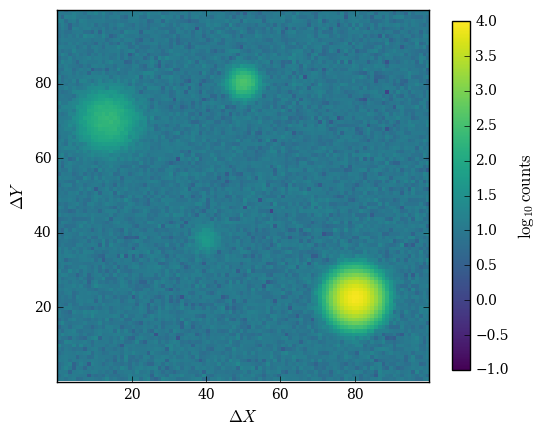

In [115]:
%run w1challenge.py ./challenge_data.txt

Notice there is a block at the end of the file defined by an `if` statement: `if __name__ == '__main__'`. 

> ```python 
if __name__ == '__main__':
     input_file = sys.argv[1] # Get the first command line argument
     plot_challenge(input_file)```

The code in this special block will be executed if the file is run from the command line (or with `%run` in IPython, which is the same thing), but **not** if the file is imported by another python script or module. If you put code at the end of the file without this block, it would be executed every time the file was imported. 

In [117]:
import w1challenge
# Nothing happens!
# But we can call the function w1challenge.plot_challenge()

Notice that `'__main__'` is a string, but `__name__` is the name of a variable. The `__` is **two** underscores. Here is [a post about this](http://stackoverflow.com/questions/419163/what-does-if-name-main-do) on StackOverflow.

## 2.1 Command line arguments

This example introduces another feature: using `sys.argv` to get arguments from the command line (in this case, the name of the input file). `sys.argv` is a list created by Python when it starts to execute a script. 

    - sys.argv[0] is always the name of the script
    - sys.argv[1] is the first command line argument (if there are any)
    - sys.argv[2] is the second command line argument, etc.
    
Anything much more complicated than using `sys.argv[1]` directly (for example, having optional arguments, variable numbers of arguments, arguments that are lists, etc. etc.) is better done with the `argparse` standard library module, which we'll introduce later.

# 3. Other useful standard library modules

These modules and functions aren't essential, but they make life easier.

## 3.1 `time` and `datetime`

In [35]:
import time

In [36]:
print(time.time.__doc__)
time.time()

time() -> floating point number

Return the current time in seconds since the Epoch.
Fractions of a second may be present if the system clock provides them.


1485121485.32322

In [37]:
time.sleep(2) # This function does nothing for 2 seconds

In [38]:
t1 = time.time()
time.sleep(5)
t2 = time.time()
print('I was asleep for {elapsed_time:f} seconds'.format(elapsed_time = t2 - t1))

I was asleep for 5.001353 seconds


Obviously, this is a good way to time how long any bit of Python code takes to run. 

In IPython there is a magic function called `%timeit`. This runs whatever comes after it a number of times (it works out how many, automatically) and computes the average time it takes.

In [32]:
%timeit np.random.random(1000)

The slowest run took 7.14 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 14.9 µs per loop


In [39]:
%timeit np.random.normal(1000)

The slowest run took 17.66 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 958 ns per loop


In [43]:
%timeit time.sleep(0.01)

100 loops, best of 3: 10.9 ms per loop


## 3.2 `argparse`

In [ ]:
import argparse 

parser = argparse.ArgumentParser()
parser.add_argument('input_file')
parser.add_argument('-o','--option', default=42, type=int)
parser.add_argument('-t','--logical_option', action='store_true')

args = parser.parse_args(['myfile.txt','-o','42'])

print(args)
print(args.input_file)
print(args.option)

In normal usage, the above would usually appear in the `if __name__ == '__main__'` block, and `sys.argv` would be passed as the argument to `parser.parse_args`.

## 3.3 `glob`

In [172]:
import glob

`glob.glob` is a quick and easy way to find all the files matching a simple pattern (this is very common when you're working with simulation outputs or observational data spread across many files and folders).

In [173]:
# Find all the python notebook files in the current directory
glob.glob('./*.ipynb')

['./01-Introduction.ipynb',
 './02-MorePython.ipynb',
 './02-ScienceWithPython.ipynb']

## 3.4 `subprocess`

We've see how to call shell commands from IPython using `!`, but what if we need to talk to the shell from an ordinary Python script? In many cases we don't need to, because the Python standard library has its own versions of some of the common shell commands. 

The more general solution is the `subprocess` module. [Here's a longer description of this module](https://pymotw.com/2/subprocess/). A common use for this is to call codes like `galfit` or `sextractor` from within a Python script.

This is very simple example, that just uses `subprocess` to list the output of the current directory (i.e. to do `ls -l`). Notice you need to split the arguments into a list (investigate the `shell=True` option if making this list is a problem for some reason).

In [234]:
import subprocess
ls_output = subprocess.check_output(['ls',"-l"])
print(ls_output)

total 267792
-rw-r--r--  1 andrew  staff    438283 23 Jan 15:53 01-Introduction.ipynb
-rw-r--r--  1 andrew  staff    302113 23 Jan 18:47 02-MorePython.ipynb
-rw-r--r--  1 andrew  staff     66924 17 Jan 18:37 02-ScienceWithPython.ipynb
-rw-r--r--  1 andrew  staff      1077 17 Jan 19:06 README.md
-rw-r--r--  1 andrew  staff  45380160 26 Sep 16:34 TgasSource_000-000-001.fits
-rw-r--r--  1 andrew  staff  45380160 26 Sep 16:34 TgasSource_000-000-001.fits.1
-rw-r--r--  1 andrew  staff  45380160 26 Sep 16:34 TgasSource_000-000-001.fits.2
-rw-r--r--@ 1 andrew  staff     43124 23 Jan 15:53 challenge.png
-rw-r--r--  1 andrew  staff       202 23 Jan 15:52 challenge_data.txt
-rw-r--r--  1 andrew  staff     23557 17 Jan 10:56 example_scatter_plot.png
drwxr-xr-x  9 andrew  staff       306 22 Jan 21:50 gaia_tgass
-rw-r--r--  1 andrew  staff      8640 22 Jan 21:52 line_data.fits
-rw-r--r--  1 andrew  staff      1172 23 Jan 18:46 line_data.npz
-rw-r--r--  1 andrew  staff      1172 22 Jan 13:58 line_dat

# 5. More matplotlib

## 5.1 Histograms

Last week we made a scatter plot of some points with a Gaussian distribution of points in (x,y). Here's the data again:

In [ ]:
np.random.seed(42)
x = np.random.normal(loc=50,scale=20,size=1000)
y = np.random.normal(loc=x+5,scale=10,size=1000)

Here's the scatter plot again:

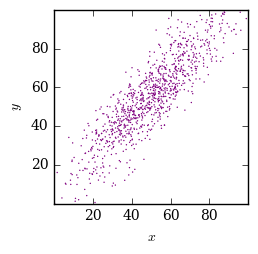

In [434]:
f_b = pl.figure(figsize=(2.5,2.5))
ax = pl.gca()
ax.scatter(x,y,s=1,edgecolor='None',c='purple',label='$z=0$')
ax.set_xlim(0,100)
ax.set_ylim(0,100)
for i in [0,-1]:
    pl.setp(ax.get_xticklabels()[i],visible=False)
    pl.setp(ax.get_yticklabels()[i],visible=False)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$');

The following example shows a simple way to plot a histogram of the `x` coordinates of these points.

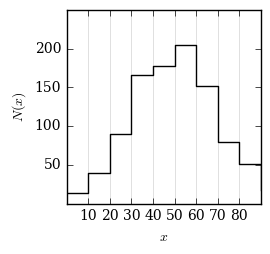

In [476]:
f = pl.figure(figsize=(2.5,2.5))

bin_edges_x = np.arange(0,110,10)
hx, junk_bins = np.histogram(x,bins=bin_edges_x) # junk_bins is just equal to bin_edges_x here
pl.plot(bin_edges_x[:-1],hx,drawstyle='steps-post',c='k')
ax = pl.gca()
for i in [0,-1]:
    pl.setp(ax.get_xticklabels()[i],visible=False)
    pl.setp(ax.get_yticklabels()[i],visible=False)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$N(x)$');

# Just for this example, plot the edges of the bins as well
for bin_edge in bin_edges_x[:-1]:
    pl.axvline(bin_edge,c='lightgrey',lw=0.5,zorder=-10);

Notice that the array of bin *edges* we use for the histogram is one element larger than the histogram itself, because the bin edges include the right-most edge. We have to chop this off with `[:-1]` when we pass the array of edges to `plot`. The option `steps-post` to `plot` tells it that each value in the array of `x` coordinates (i.e. `bin_edges_x`) is the *left-hand* side of a bin that extends to the next value.

I prefer that way of doing it because it's simple, but there are alternatives. For example, you could use the `hist` function of `matplotlib`, which is just as easy to use but draws more 'stuff' on the plot (a bunch of rectangles, rather than a line).

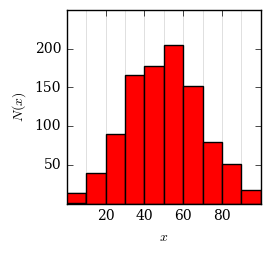

In [473]:
f = pl.figure(figsize=(2.5,2.5))
h,junk_bins,patches = pl.hist(x,bins=np.arange(0,110,10),color='red')

ax = pl.gca()
for i in [0,-1]:
    pl.setp(ax.get_xticklabels()[i],visible=False)
    pl.setp(ax.get_yticklabels()[i],visible=False)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$N(x)$');

# Just for this example, plot the edges of the bins as well
for bin_edge in bin_edges_x[:-1]:
    pl.axvline(bin_edge,c='lightgrey',lw=0.5,zorder=-10);

(Notice that `hist` returns the `patches` (rectangles) used to make the plot, as well as the histogram and the bins that you get from `np.histogram`.) 

You can make the matplotlib version draw a line instead using the option `histtype='step'`, as in the next example.

It's common to normalize histograms such that the total area underneath them is equal to 1. You can do this with the `normed=True` keyword argument (either in `numpy` or `matplotlib`).

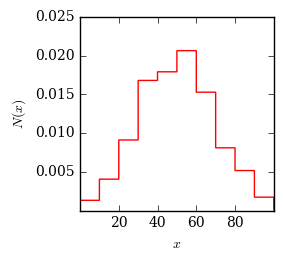

In [475]:
f = pl.figure(figsize=(2.5,2.5))

h_matplot,junk_bins,patches = pl.hist(x,bins=np.arange(0,110,10),color='red',normed=True,histtype='step')

ax = pl.gca()
for i in [0,-1]:
    pl.setp(ax.get_xticklabels()[i],visible=False)
    pl.setp(ax.get_yticklabels()[i],visible=False)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$N(x)$');

We can plot the generating distribution (the Gaussian we sampled `x` from in the first place) over the top of the histogram. 

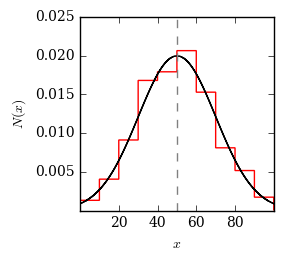

In [489]:
f = pl.figure(figsize=(2.5,2.5))

h_matplot,junk_bins,patches = pl.hist(x,bins=np.arange(0,110,10),color='red',normed=True,histtype='step')

# Import a useful routine to work with the normal distribution from the scipy package.
from scipy.stats import norm
xx = np.arange(0,100.1,0.1) # we need a lot of x values to make a smooth distribution
# norm.pdf(x,mean,sigma) gives the value of the normal distribution at x
pl.plot(xx,norm.pdf(xx,50,20.0),c='k',drawstyle='steps-post',ls='solid')
pl.axvline(50,c='grey',ls='--') # helpful line at the mean of the distribution

ax = pl.gca()
for i in [0,-1]:
    pl.setp(ax.get_xticklabels()[i],visible=False)
    pl.setp(ax.get_yticklabels()[i],visible=False)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$N(x)$');

Last thing for this example: what if we wanted to plot the underlying Gaussian distribution at the same resolution as our binned `x` data?

(0, 100)

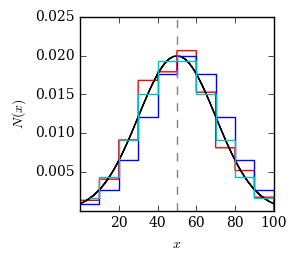

In [504]:
f = pl.figure(figsize=(2.5,2.5))

h_matplot,junk_bins,patches = pl.hist(x,bins=np.arange(0,110,10),color='red',normed=True,histtype='step')

from scipy.stats import norm
# Smooth version as above
xx = np.arange(0,100.1,0.1)
pl.plot(xx,norm.pdf(xx,50,20.0),c='k',drawstyle='steps-post',ls='solid')
# Blocky version
pl.plot(bin_edges_x,norm.pdf(bin_edges_x,50,20.0),c='b',drawstyle='steps-post')

pl.axvline(50,c='grey',ls='--') # helpful line at the mean of the distribution

ax = pl.gca()
for i in [0,-1]:
    pl.setp(ax.get_xticklabels()[i],visible=False)
    pl.setp(ax.get_yticklabels()[i],visible=False)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$N(x)$');
pl.xlim(0,100)

The blue histogram doesn't line up... see if you can fix it. 

This is quite an easy mistake to make, but the solution isn't as easy as it looks. Clue: you need to add one line to make different values of x to give to `norm.pdf`, and use these in the blocky-version `plot` line together with a change to one of the optional arguments. 

The above example used two keyword arguments available in most `matplotlib` routines: 
- `alpha`: changes the transparency of lines or markers (`alpha=0` transparent, `alpha=1` solid)
- `zorder`: changes the relative ordering of lines or markers (objects with high `zorder` are drawn on top of those with lower `zorder`).

## 5.2 Legends

This example shows how to make a legend automatically by adding 'label=' arguments in routines that add points and lines to plots.

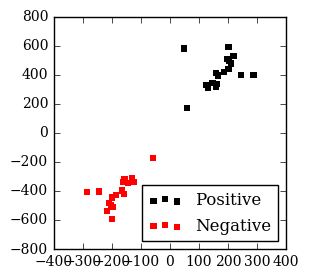

In [505]:
pl.figure(figsize=(3,3))
pl.scatter(line_data['x'],line_data['y'],marker='s',edgecolor='None',c='k',label='Positive')
pl.scatter(-line_data['x'],-line_data['y'],marker='s',edgecolor='None',c='r',label='Negative')
pl.legend(loc='lower right') # Loc is the location of the legend.

We can change the look of the legend using its many options. Here I get rid of the box around it, change the symbols to be big squares rather than the default of three little squares, and put the labels on the left-hand side.

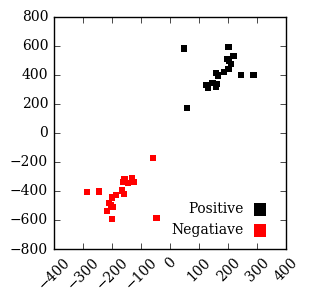

In [506]:
pl.figure(figsize=(3,3))
pl.scatter(line_data['x'],line_data['y'],marker='s',edgecolor='None',c='k',label='Positive')
pl.scatter(-line_data['x'],-line_data['y'],marker='s',edgecolor='None',c='r',label='Negatiave')
pl.legend(loc='lower right',frameon=False,scatterpoints=1,markerscale=2,
          markerfirst=False,handletextpad=0.2,fontsize=10);

# Let's fix the x tick labels while we're at it...
ax = pl.gca()
pl.setp(ax.get_xticklabels(),rotation=45);

Sometimes we want to have even more control over the legend. You can build your own legend by passing explicit `handles` and `labels` as the first two arguments to `legend`. The `labels` are just the text for each entry. The `handles` are 'primitive' matplotlib objects -- for example, a line is `Line2D`. This allows us to control the order of the legend without changing the order of the plot, and (for example) to have a line in the legend even though the points on the plot were made with `scatter`.

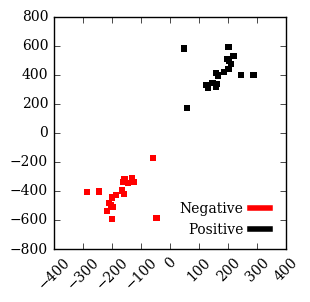

In [509]:
pl.figure(figsize=(3,3))
pl.scatter(line_data['x'],line_data['y'],marker='s',edgecolor='None',c='k')
pl.scatter(-line_data['x'],-line_data['y'],marker='s',edgecolor='None',c='r')

ax = pl.gca()
pl.setp(ax.get_xticklabels(),rotation=45);

# Make a list of handles and a list of labels (in the same order).
handles = list()
labels  = list()

handles.append(pl.Line2D([0],[1],c='r',lw=4))
labels.append('Negative')

handles.append(pl.Line2D([0],[1],c='k',lw=4))
labels.append('Positive')

pl.legend(handles,labels,loc='lower right',frameon=False,scatterpoints=1,markerscale=2,
          markerfirst=False,handletextpad=0.2,fontsize=10);

This even allows us to put two legends on the same plot, **but** we need to use a trick, otherwise `matplotlib` removes the first legend when we plot the second one.

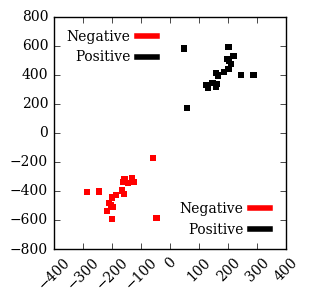

In [510]:
pl.figure(figsize=(3,3))
pl.scatter(line_data['x'],line_data['y'],marker='s',edgecolor='None',c='k')
pl.scatter(-line_data['x'],-line_data['y'],marker='s',edgecolor='None',c='r')

ax = pl.gca()
pl.setp(ax.get_xticklabels(),rotation=45);

# Make a list of handles and a list of labels (in the same order).
handles = list()
labels  = list()

handles.append(pl.Line2D([0],[1],c='r',lw=4))
labels.append('Negative')
handles.append(pl.Line2D([0],[1],c='k',lw=4))
labels.append('Positive')

# Notice we store whatever gets returned from legend in a variable here
legend1 = pl.legend(handles,labels,loc='lower right',frameon=False,scatterpoints=1,markerscale=2,
          markerfirst=False,handletextpad=0.2,fontsize=10);

# For the sake of this example, just plot the same legend again in a different place. 
# This removes legend1 from the plot!
legend2 = pl.legend(handles,labels,loc='upper left',frameon=False,scatterpoints=1,markerscale=2,
          markerfirst=False,handletextpad=0.2,fontsize=10);

# Trick to get the first legend back:
ax = pl.gca() # get the axes object
ax.add_artist(legend1) # put the first legend back

## 5.3 Grids of plots

This example shows how to make a grid of plots using the `gridspec` module. There is a more 'low level' way to do this that use `pl.subplot` directly without importing `gridspec`, but I don't recommend that, because I find gridspec is much easier to use. Be warned, over time `matplotlib` has introduced (too many) different ways to do this, so there is a lot of old, confusing advice on the web. 

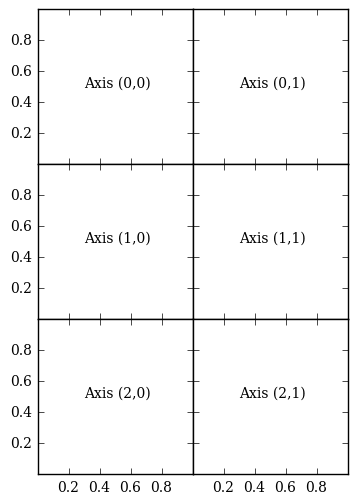

In [514]:
import matplotlib.gridspec as gridspec

figure = pl.figure(figsize=(4,4*3.0/2.0))

nrow, ncol = 3,2
gs         = gridspec.GridSpec(nrow,ncol,wspace=0.0,hspace=0.0)

# This GridSpec object can be indexed with [] like a list or array.
# The wspace=0 and hspace=0 remove all the space between the panels.
# Set them to something larger (e.g. 1.0) if you want space between
# the panels.

# For later reference, I like to store each panel of the plot in a list
axes = list()

# Loop over rows and columns
for irow in xrange(0,nrow):
    for icol in xrange(0,ncol):
        # Pass the GridSpec object for this row and column to pl.subplot
        # This creates and returns a new axes object representing this panel.
        ax = pl.subplot(gs[irow,icol])
    
        # Plot something on this axis. In this case, we'll just write the
        # row and column as a text label (explained below)
        pl.text(0.3,0.5,'Axis (%d,%d)'%(irow,icol),transform=ax.transAxes)
        axes.append(ax) # store this axes object in our list

# Now format all the axes -- for example, get rid of the labels on the
# x-axis, except for the bottom row. 

# I like to put this formatting at the end, but it could be
# included along with the loop that makes the plots above. 

# There are lots of ways to do this. This way should work 
# regardless of the values of nrow and ncol.
axes       = np.array(axes).reshape(nrow,ncol) # reshape the list we made to match the shape of the plot
# This will be True for the bottom row, where we 
has_xtick  = np.repeat(True,nrow*ncol).reshape(nrow,ncol)
has_xtick[:-1,:] = False
has_ytick  = np.repeat(True,nrow*ncol).reshape(nrow,ncol)
has_ytick[:,1:] = False

for iax in xrange(0,6):
    # This is an alternative to a nested loop over irow, icol
    gridcoord = np.unravel_index(iax,(nrow,ncol))
    # Hide x tick labels, except for the bottom row
    pl.setp(axes[gridcoord].get_xticklabels(),visible=has_xtick[gridcoord])
    # Hide y tick labels, except for the left hand column 
    pl.setp(axes[gridcoord].get_yticklabels(),visible=has_ytick[gridcoord])
    # Trim the tick labels from the end of each axis
    pl.setp(axes[gridcoord].get_xticklabels()[0],visible=False)
    pl.setp(axes[gridcoord].get_xticklabels()[-1],visible=False)
    pl.setp(axes[gridcoord].get_yticklabels()[0],visible=False)
    pl.setp(axes[gridcoord].get_yticklabels()[-1],visible=False)

In the above example, we wrote text labels using `pl.text(x,y,label)`. We included the optional argument `transform=ax.transAxes`. This 'magic' lets us write `x` and `y` for the text as fractions of the extent of each axis (i.e. numbers between 0 and 1). If we didn't, we would have to give `x` and `y` in the units of the axis, which is usually not what we want to do, unless we're putting labels near specific data points.

## 5.4 Fill Between

This example should be obvious when you've made the plot. If you use this in more complicated situations and it comes out looking ugly, have a look at the `where` argument to `fill_between`.

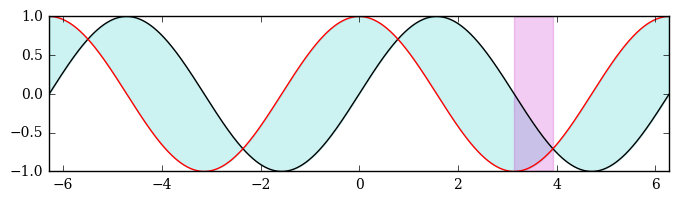

In [516]:
x  = np.arange(-2*np.pi,2*np.pi,0.01)
y1 = np.sin(x)
y2 = np.sin(x+np.pi/2.0)

pl.figure(figsize=(8,2))
pl.plot(x,y1,c='k')
pl.plot(x,y2,c='r')
pl.fill_between(x,y1,y2,color='c',alpha=0.2)

# Notice what's going on with the '2*list' here
pl.fill_betweenx([-1,1],2*[2*np.pi/2.0],2*[2.5*np.pi/2.0],color='m',alpha=0.2)

pl.xlim(-2*np.pi,2*np.pi)
pl.ylim(-1,1);

# 4. More `numpy`

A more complete discussion of the basic use of `numpy` is given [here](http://www.scipy-lectures.org/intro/numpy/operations.html). These are all things that, based on my experience, you will end up using all the time. Obviously this can only cover the most basic operations.

## 4.1 Copies vs. references

We covered this for basic Python data types last week, and saw the `copy` module. Numpy arrays have their own in-built `copy` function which does the same thing, and is the best way to copy them.

In [177]:
x = np.zeros(3,dtype=np.float32)
y = x
z = x.copy()
x[2] = 100.0 # set an element of x

print('x = {}'.format(x))
print('y = {}'.format(y))
print('z = {}'.format(z))
print('y is x? {}'.format(y is x))
print('z is x? {}'.format(z is x))

x = [   0.    0.  100.]
y = [   0.    0.  100.]
z = [ 0.  0.  0.]
y is x? True
z is x? False


The point is that `y=x` makes `y` a reference to `x`, rather than a copy, so updating `y` also updates `x`. In practice it can get quite hard to guess whether any of the hundreds of functions in `numpy` will return a copy or a reference to the array you give it as input (in some cases this even depends on the input!).

Bottom line: when you really want a copy, explicitly make a copy.

## 4.2 Sorting arrays

There are two simple ways to sort an array `x`: either `np.sort(x)`, which returns a copy of `x` in sorted order, or `x.sort()`, which sorts x 'in place' -- it actually moves the values in `x` itself into sorted order.

This choice between `np.something(x)` (copy) and `x.something()` (in place change to `x`) is similar for a lot of `numpy` functions.

In [200]:
np.random.seed(42)
x = np.random.randint(0,100,size=10) # Some random integers
print('Original x: {}'.format(x))
print('np.sort(x): {}'.format(np.sort(x))) # np.sort returns a copy
print('         x: {}'.format(x))
print('  x.sort(): {}'.format(x.sort()))   # x.sort() returns None...
print('         x: {}'.format(x))          # but now x is sorted!

Original x: [51 92 14 71 60 20 82 86 74 74]
np.sort(x): [14 20 51 60 71 74 74 82 86 92]
         x: [51 92 14 71 60 20 82 86 74 74]
  x.sort(): None
         x: [14 20 51 60 71 74 74 82 86 92]


In [201]:
np.random.seed(42)
x = np.random.randint(0,100,size=10) # Some random integers
a = np.argsort(x)
print(a)          # The *indices* rather than the *values* in sorted order
print(x[a])       # Use the indices to sort the array
print(x[a[::-1]]) # Sort backwards by reversing the indices

[2 5 0 4 3 8 9 6 7 1]
[14 20 51 60 71 74 74 82 86 92]
[92 86 82 74 74 71 60 51 20 14]


This is useful because you can now use the indices `a` to put any other array in the same order, not just `x`.

## 4.3 Concatenating, stacking and splitting

These are all ways to combine multiple arrays into a single array. `vstack` and `hstack` add rows and columns respectively, increasing the dimension of the array (i.e. making two 1d arrays into one 2d array). `vstack` means 'vertical stack' (add more rows) and `hstack` means horizontal stack (add more columns) -- experiments are the easiest way to understand what the difference is. 

`concatenate` joins arrays end-to-end along a particular dimension (by default, the first one). For example, it's the standard way to combine a list of 1d arrays into one big 1d array.

In [211]:
x = np.arange(10,25)
y = np.arange(30,45)

print('x = {}'.format(x))
print('y = {}'.format(y))
print('concatenated: {}'.format(np.concatenate((x,y))))

v = np.vstack((x,y))
print('shape after vstack: {}'.format(u.shape))

h = np.hstack((x,y))
print('shape after hstack: {}'.format(v.shape))

# In this case, stacking horizontally is the same as concatenating 
print(np.all(h == np.concatenate([x,y])))

x = [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
y = [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
concatenated: [10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44]
shape after vstack: (10,)
shape after hstack: (2, 15)
True


There are also very similar functions to split up arrays into smaller arrays. Following on from the previous cell:

In [212]:
a,b = np.vsplit(v,2)
np.all(a==x) and np.all(b==y) # We should be back to where we started!

True

## 4.4 Creating arrays, repeat, reshape

There are [loads of different functions](https://docs.scipy.org/doc/numpy/reference/routines.array-creation.html) for creating arrays in `numpy`. These include `zeros` to make an empty array and `repeat` to make an array where every element has a particular value. We saw these last week.

Let's examine how long it takes to create a big array of -1's, using IPython's `%timeit` magic function.

In [213]:
%timeit np.zeros(1000) - 1

The slowest run took 10.72 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.94 µs per loop


In [214]:
%timeit np.repeat(-1,1000)

The slowest run took 6.66 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 9.35 µs per loop


So in this case, the first way is about 3x faster. This is helpful to know if you're making very big arrays. If you can think of two ways to do something, then either is fine, unless one of them **really** slows down your program. 

Sometimes we want to make an array with a repeating pattern, like `[1,0,-1,1,0,-1,1,0,0,-1]`. Let's try to do that with repeat:

In [215]:
np.repeat((1,0,-1),10)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

Clearly that's not the right way to do it. The correct function in this case is `tile`:

In [218]:
np.tile((1,0,-1),10)

array([ 1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0,
       -1,  1,  0, -1,  1,  0, -1,  1,  0, -1,  1,  0, -1])

The `reshape` function can be used if we want a 2d version

In [219]:
np.reshape(np.tile((1,0,-1),10), (10,3))

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

## 4.5 Record arrays (recarrays)

You can define your own numpy data types that are combinations of the basic types, with each element of the new composite type associated with a name. This is useful for storing **structured data**, and the most general way to do that with `numpy` (although in many cases you might find the Table class from `astropy` easier to work with).

The `line_data` we defined in the first cell is a structured array:

In [133]:
line_data[0:3] # Show the first three elements 

array([(1, 201.0, 592.0, 9.0, 61.0, -0.84),
       (2, 244.0, 401.0, 4.0, 25.0, 0.31),
       (3, 47.0, 583.0, 11.0, 38.0, 0.64)], 
      dtype=[('ID', '<i4'), ('x', '<f8'), ('y', '<f8'), ('sigma_x', '<f8'), ('sigma_y', '<f8'), ('rho_xy', '<f8')])

In [135]:
# You can see this has a complicated dtype, made up of 6 elements
line_data.dtype

dtype([('ID', '<i4'), ('x', '<f8'), ('y', '<f8'), ('sigma_x', '<f8'), ('sigma_y', '<f8'), ('rho_xy', '<f8')])

In [138]:
# line_data is **not** a 20x6 array, it's a 20x1 array of elements of this dtype.
line_data.shape

(20,)

In [140]:
# If you want to know the total number of bytes in each element, you can:
line_data.dtype.itemsize

44

*The important thing* is that individual fields can be accessed by name:

In [141]:
line_data['ID']

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int32)

To make a record array like this from scratch, use the function `numpy.dtype`, passing a ***list of tuples*** of the form (`name_of_field`, `data_type_of_field`). The data type can either be an existing `dtype`, like `numpy.int32`, or a string. `numpy` will convert the string into a dtype, if it can. The '<' and '>' indicated 'little endian' or 'big endian' representations. For example


In [143]:
my_dtype = np.dtype([('ID', '|S16'), ('ra', '<f8'), ('dec', '<f8')])
np.zeros(4,dtype=my_dtype) # Make an empty array with four of these elements

array([('', 0.0, 0.0), ('', 0.0, 0.0), ('', 0.0, 0.0), ('', 0.0, 0.0)], 
      dtype=[('ID', 'S16'), ('ra', '<f8'), ('dec', '<f8')])

The `|S16` is the way to specify a string of length 16 characters as a datatype. 

## 4.6 Logical masks and crazy floating point values (`nan` and `inf`)

We can make an array of booleans that indicate whether each element in the array meets some criterion we define. These are often called 'masks'.

In [144]:
mask = (line_data['x'] > 200.0) & (line_data['y'] > 500.0)
mask

array([ True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False], dtype=bool)

We can 'filter' the array by using the mask as an index.

In [145]:
line_data[mask]

array([(1, 201.0, 592.0, 9.0, 61.0, -0.84),
       (8, 202.0, 504.0, 4.0, 14.0, -0.05),
       (19, 218.0, 533.0, 6.0, 16.0, -0.78)], 
      dtype=[('ID', '<i4'), ('x', '<f8'), ('y', '<f8'), ('sigma_x', '<f8'), ('sigma_y', '<f8'), ('rho_xy', '<f8')])

As we saw last week, we can use `numpy.where` to find the actual indices of the elements for which the mask is `True`:

In [220]:
w = np.where(mask)[0]
print(w)
line_data[w]

[ 0  7 18]


array([(1, 201.0, 592.0, 9.0, 61.0, -0.84),
       (8, 202.0, 504.0, 4.0, 14.0, -0.05),
       (19, 218.0, 533.0, 6.0, 16.0, -0.78)], 
      dtype=[('ID', '<i4'), ('x', '<f8'), ('y', '<f8'), ('sigma_x', '<f8'), ('sigma_y', '<f8'), ('rho_xy', '<f8')])

Very often you'll end up doing something like taking the `log10` of an array with some negative numbers or dividing an array by another array with zeros in it. In those cases, the special values `nan` (not a number), `inf` (infinity) and `-inf` (negative infinity) will show up in the results, mixed in with the elements where whatever operation you tried *was* mathematically valid. For example:

In [416]:
crazy_values = np.log10(np.tile((1,0,-1),10)) # This will cause some warnings to appear!
print(crazy_values[0:3])

[  0. -inf  nan]


/Users/andrew/python/miniconda2/envs/tutorial2016/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/andrew/python/miniconda2/envs/tutorial2016/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


`numpy` has some routines to make masks of the elements that contain these special values.

In [222]:
np.where(np.isinf(crazy_values))

(array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28]),)

In [223]:
np.where(np.isnan(crazy_values))

(array([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29]),)

The `isfinite` routine returns True for the elements in its argument that are *not* any of these special values.

In [226]:
np.where(np.isfinite(crazy_values))

(array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27]),)

___
Further reading:

For advanced/frequent work with masked arrays, there is also the `numpy.ma` module, which defines a new 'masked array' type. This gets quite complicated to work with and I don't use it very often. It will be more useful if you are doing complicated linear algebra.

## 4.7 `numpy.where` with 2d arrays

Last week we saw that (for example) `np.where(x>something)` returns a tuple of length 1 if `x` is a 1d array, so to get the actual elements of x that are `>something` we need to get the first (and only) element of the result: `np.where(x>something)[0]`.

What if `x` is 2d?

In [227]:
x = np.arange(9).reshape((3,3))
print(x.shape)
w = np.where(x > 4)
print(w) # note this is a tuple of length 2
print(x[w])

(3, 3)
(array([1, 2, 2, 2]), array([2, 0, 1, 2]))
[5 6 7 8]


## 4.8 Unique values

To find the unique values in an array, use `numpy.unique`.

In [228]:
x = np.random.randint(0,10,20) # 20 random integers between 0 and 10
print(x)
print(np.unique(x))

[2 2 1 8 3 9 5 1 8 6 9 4 6 3 9 6 1 6 3 3]
[1 2 3 4 5 6 8 9]


Note that the results are sorted. The `numpy.unique` function has some useful optional arguments:

In [229]:
u, idx, inv, counts = np.unique(x,return_index=True,return_inverse=True,return_counts=True)

You can check what these do yourself. One useful application is to make a list of lengths and offsets of values in a sorted array. Here's a trivial example.

In [262]:
x = np.random.randint(0,10,200) # 20 random integers between 0 and 10
a = np.argsort(x)
values, offset, length = np.unique(x[a],return_index=True,return_counts=True)
for u,o,l in zip(values,offset,length):
    print('{} | {}'.format(u, x[a][o:o+l] ))

0 | [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1 | [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
2 | [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
3 | [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
4 | [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
5 | [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
6 | [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
7 | [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
8 | [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
9 | [9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]


Now imagine that `x` is a label that groups some other properties: for example, the 'galaxy ID' of particles in a cosmological simulation or the 'source ID' of multiple exposures of a set of targets observed with a spectrograph. The lengths and offset arrays can be used to find the properties of the subsets defined by `x`:

In [266]:
luminosity = np.random.random(200) # Some property associated with each x from the last cell

print('  | Total Luminosity')
for u,o,l in zip(values,offset,length):
    print('{} | {}'.format(u, np.sum(luminosity[a][o:o+l])))


  | Total Luminosity
0 | 14.4892817663
1 | 8.90516244462
2 | 11.7855214302
3 | 11.2350005514
4 | 8.59976069748
5 | 11.9261409773
6 | 10.0946664516
7 | 10.9680312907
8 | 8.27381336106
9 | 9.46775938406


There are even more general ways to do something similar (the `pandas` package has many such functions) and more efficient techniques with `numpy`, to get rid of that `for` loop (too advanced for this tutorial, but if you want more details have a look at the documentation for `numpy.ufunc.reduceat` and google for some examples, e.g. of `add.reduceat`). The above example works well in most simple cases. Remember the array has to be sorted!

## Testing if values are in another array using in1d

`numpy.in1d` provides a quick way to check if each element of an array is in another array, but it doesn't tell you *where* those elements are in the other array.

In [751]:
odd_numbers = np.arange(1,100,2)
np.in1d([1,2,3,4,5],odd_numbers)

array([ True, False,  True, False,  True], dtype=bool)

Efficiently finding the index of each matching element in the other array is the point of the next example.

## 4.9 Finding locations of specific values in arrays

Matching specific values in very long lists of arbitrary integers is a common task; for example, in working with the particle data from cosmological simulations, you might might have a list of particle IDs in one snapshot of the simulation, and want to find the same particles in another snapshot.

Currently, this operation isn't covered by an existing routine in `numpy` or `scipy` (as far as I know!). The nearest thing is in the `pandas` statistics package, which we'll look at next week. However, it's not *too* hard to write such a routine yourself. This is the basis of one of the challenges.

First, we'll make an array of 1000 unique integer values, `BIG_ARRAY`. Since we want the values to be unique but not sorted for this example, this takes a couple of steps to set up:

In [407]:
np.random.seed(42)
x         = np.random.randint(0,500,200) # 200 random integers between 0 and 500
BIG_ARRAY = np.unique(x)

# Note this trick for getting a random ordering by sorting random numbers
random_order = np.argsort(np.random.random(len(BIG_ARRAY)))
BIG_ARRAY    = BIG_ARRAY[random_order]

BIG_ARRAY    = BIG_ARRAY + 2000 
print(BIG_ARRAY)

[2054 2330 2149 2409 2100 2474 2454 2171 2217 2034 2049 2498 2128 2201 2062
 2091 2254 2328 2339 2269 2458 2008 2475 2241 2041 2095 2213 2252 2392 2178
 2088 2105 2359 2102 2484 2259 2134 2459 2087 2052 2270 2418 2313 2489 2032
 2061 2315 2455 2348 2491 2048 2212 2435 2151 2216 2385 2058 2050 2483 2343
 2174 2306 2461 2463 2226 2190 2099 2282 2138 2043 2379 2162 2326 2040 2417
 2188 2071 2460 2319 2372 2337 2397 2205 2351 2257 2230 2161 2064 2004 2243
 2350 2443 2166 2098 2264 2401 2445 2303 2363 2169 2014 2001 2027 2156 2358
 2387 2053 2389 2300 2476 2236 2160 2080 2020 2251 2206 2106 2273 2214 2121
 2345 2240 2344 2427 2406 2295 2200 2187 2215 2191 2235 2466 2276 2492 2292
 2279 2207 2391 2021 2267 2047 2419 2288 2378 2051 2471 2293 2308 2221 2013
 2430 2263 2309 2135 2366 2448 2256 2189 2327 2413 2260 2130]


I generated 200 random integers between 0 and 500, find only the unique values, then randomize their order. To make it clear that the numbers can be anything for this example, I added 2000 to each of them. 

Now let's say we wanted to find where the value 2059 was in this array. Obviously we could use `where`:

In [410]:
np.where(BIG_ARRAY == 2201)[0]

array([13])

and if we wanted to find more values, we might use a loop:

In [409]:
# Reset the seed, so we get consistent results each time we try this
np.random.seed(232)
small_array = np.random.randint(2100,2300,10) # some values to look for: not all of them will be found!

# Loop
matches = list()                                    
for s in small_array:
    w = np.where(BIG_ARRAY == s)[0]
    if len(w) == 0:
        # If we didn't find anything, store -1
        matches.append(-1)
    else:
        matches.append(w[0])
    
matches = np.array(matches)
print(matches)

[ -1  31 161  84  -1  -1  92 146  -1  -1]


However, if either `small_array` or `BIG_ARRAY` are large, this is a very slow way to do it, because `np.where` has to compare each value from `small_array` against *every* value in BIG_ARRAY. In most of these cases, we didn't even find a match.

**Solution:** When we're dealing with large arrays, it's usually more efficient to sort `BIG_ARRAY` and use a [**bisection search**](https://en.wikipedia.org/wiki/Binary_search_algorithm). In `numpy` we can do this with the `searchsorted` function.

In [411]:
# First sort BIG_ARRAY
sorting_idx = np.argsort(BIG_ARRAY)

In [412]:
# Now use searchsorted (have a look at the docstring for this routine as well)

# What is the *smallest* index in the sorted BIG_ARRAY where I can insert the value '2101'
# without changing the order of BIG_ARRAY?
print(BIG_ARRAY[sorting_idx].searchsorted(2201,side='left'))

# What is the *largest* index in the sorted BIG_ARRAY where I can insert the value '2101'
# without changing the order of BIG_ARRAY?
print(BIG_ARRAY[sorting_idx].searchsorted(2201,side='right'))

60
61


In [413]:
# Just to demonstrate that's the case, show the indices around 56-57
BIG_ARRAY[sorting_idx][[59,60,61,62]]

array([2200, 2201, 2205, 2206])

Notice that doesn't directly tell us which of the indices (56 or 57) is *equal* to  2189, or even that **either** of them are. However, look what happens when we try to find a value that isn't in `BIG_ARRAY`:

In [414]:
print(BIG_ARRAY[sorting_idx].searchsorted(2202,side='left'))
print(BIG_ARRAY[sorting_idx].searchsorted(2201,side='right'))

61
61


This should be enough information to get started with the 'matching values in huge arrays of integers' challenge at the end of the notebook. 

# 6. Scipy

The `scipy` package has more complicated numerical procedures that work (mostly) with `numpy` arrays. I've only ever used a small fraction of them! The following are examples of some `scipy` routines I find useful.

#### 6.0.0.1 Finding neighbours with KD Trees

[KDTree](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.KDTree.html) provides an efficient way to search for neighbours of points in large sets of coordinates. This example shows how to do this for a 2D array of coordinates (it also shows how to draw a circle on a plot).

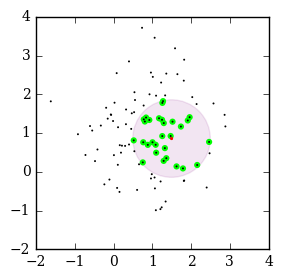

In [684]:
from scipy.spatial.kdtree import KDTree

np.random.seed(42)
xy = np.random.normal(1,1,(100,2))
kd = KDTree(xy) # construct the tree by passing an array of coordinates

# Show the points on a scater plot
pl.figure(figsize=(3,3))
pl.scatter(xy[:,0],xy[:,1],s=2,edgecolor='None',c='k')

# Find all the points within radius r=1 of the first point
radius = 1
idx  = kd.query_ball_point(xy[0,:],radius) # returns the index of each point in xy within r<=1 of element 0

# Highlight the neighbours on the plot
pl.scatter(xy[0,0],xy[0,1],c='r',s=5,zorder=10,edgecolor='None')
for i in idx[:]:
    if i != 0:
        pl.scatter(xy[i,0],xy[i,1],c='lime',s=20,edgecolor='None',zorder=0)

# Draw a circle of radius 1
ax = pl.gca()
ax.add_artist(pl.Circle([xy[0,0],xy[0,1]],radius=radius,color='purple',alpha=0.1,zorder=-1));


There is also `cKDTree`, which is an optimized version of `KDTree` for very large datasets, with fewer functions.

#### 6.0.0.2 Interpolating

Hopefully you're familiar with the basic idea of interpolation. The `scipy.interpolate.interp1d` function returns another function that takes a set of points `x` and associated 'measured values' `y` and returns an interpolated value of `y` at any intermediate value of `x`.

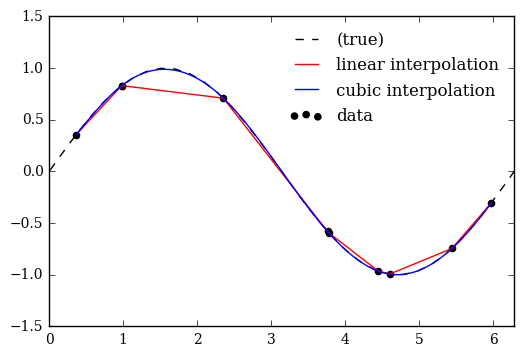

In [710]:
import scipy.interpolate as spi

# 10 sparsely-sampled 'data' points
np.random.seed(42)
x = np.random.uniform(0,2*np.pi,10)
pl.scatter(x,np.sin(x),c='k',label='data')

# Linearly interpolate between these points.
linear_interp = spi.interp1d(x,np.sin(x),kind='linear')
cubic_interp  = spi.interp1d(x,np.sin(x),kind='cubic')

xx  = np.linspace(x.min(),x.max(),100)
_xx = np.linspace(-np.pi/2.0,2.5*np.pi) # Show true curve over a wider range in x
pl.plot(_xx,np.sin(_xx),c='k',ls='--',label='(true)')
pl.plot(xx,linear_interp(xx),c='r',label='linear interpolation')
pl.plot(xx,cubic_interp(xx),c='b',label='cubic interpolation')

pl.legend(loc='upper right',frameon=False);
pl.xlim(0,2*np.pi);

Have a look at the documentation for `interp1d`. What happens if you try to use the interpolating function for values smaller than `x.min()` or larger than `x.max()`? How can you change that behaviour?

One common use of interpolation is to invert functions numerically -- i.e. to construct a continuous function that returns `x(y)` for any `y` using data that sample `y(x)` at a few values of `x`. (Obviously the functions have to be single-valued for that to work, which isn't the case for `sin(x)`.)

#### 6.0.0.3 Integration

This simple example numerically integrates `y=x**2` between 4 and 6, just to demonstrate how to do this with `scipy`. Practical uses of numerical integration often turn out to be a lot more complicated!

The main point of this example is that numerical integration by Gaussian quadrature usually works well enough.

Analytic solution: 50.6666666667
Quad. solution:    50.6666666667
Number of samples in interval = 20
Simpson solution:  48.5690493343


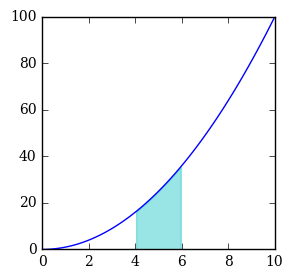

In [748]:
import scipy.integrate as spint

x = np.linspace(0,10,100)

pl.figure(figsize=(3,3))
pl.plot(x,x**2);
pl.fill_between(x,x**2,0,where=((x>=4) & (x<=6)),alpha=0.4,color='c')

# The analytic solution
analytic = lambda x: (1/3.0)*x**3
print('Analytic solution: {}'.format(analytic(6)-analytic(4)))

# The numerical solution using adaptive gaussian quadrature
func = lambda t: t**2 # the function to integrate
integral_quad, quad_err = spint.quad(func,4,6)
print('Quad. solution:    {}'.format(integral_quad))

# The numerical solution using samples of the function
mask = (x>=4) & (x<=6)
print('Number of samples in interval = %d'%(np.sum(mask)))
integral_simps = spint.simps(x[mask]**2,x[mask])
print('Simpson solution:  {}'.format(integral_simps))


Be aware of that functions exist to do Romberg integration: `scipy.integrate.romberg` (continuous functions) and `scipy.integrate.romb` (same thing for discrete samples).

# 7. Astropy

[`astropy`](http://www.astropy.org/) is a large third-party Python package written as a collaborative effort among many astronomers. It provides a lot of functions useful in many astronomical tasks, including things like handling spherical coordinates in different systems and reading arrays of data in common formats (including astro-specific things like FITS headers that define exotic coordinate systems, and VOTables). 

`astropy` is in continuous and active development, although the core parts are now quite stable. Don't trust `astropy` to be absolutely bullet-proof for anything you really care about, but do use it to avoid re-inventing the wheel. 

Also, if you use it for work that goes into a paper, you should mention it in the Acknowledgements. Strictly speaking this should also go for `numpy`, `scipy`, `matplotlib` and anything else you use that was written by someone else. This is still not as widespread as it should be.

In [623]:
import astropy

Astropy's `Table` class is a very useful for dealing with most astronomical data in tabular form, particularly that read from FITS files, a common 'structured binary' format developed for astronomy and widely used for most observational data. Full documentation [here](http://docs.astropy.org/en/stable/table/), including a 'Getting Started' section.

In [49]:
# Tables; reading and writing FITS
from astropy.table import Table, Column

# It's easy to turn a numpy recarray into a Table
t = Table(line_data)
print(t)

 ID   x     y   sigma_x sigma_y rho_xy
--- ----- ----- ------- ------- ------
  1 201.0 592.0     9.0    61.0  -0.84
  2 244.0 401.0     4.0    25.0   0.31
  3  47.0 583.0    11.0    38.0   0.64
  4 287.0 402.0     7.0    15.0  -0.27
  5 203.0 495.0     5.0    21.0  -0.33
  6  58.0 173.0     9.0    15.0   0.67
  7 210.0 479.0     4.0    27.0  -0.02
  8 202.0 504.0     4.0    14.0  -0.05
  9 198.0 510.0    11.0    30.0  -0.84
 10 158.0 416.0     7.0    16.0  -0.69
 11 165.0 393.0     5.0    14.0    0.3
 12 201.0 442.0     5.0    25.0  -0.46
 13 157.0 317.0     5.0    52.0  -0.03
 14 131.0 311.0     6.0    16.0    0.5
 15 166.0 400.0     6.0    34.0   0.73
 16 160.0 337.0     5.0    31.0  -0.52
 17 186.0 423.0     9.0    42.0    0.9
 18 125.0 334.0     8.0    26.0    0.4
 19 218.0 533.0     6.0    16.0  -0.78
 20 146.0 344.0     5.0    22.0  -0.56


It's easy to save tables as FITS files.

In [624]:
t.write('line_data.fits',overwrite=True)
t = Table.read('line_data.fits')

For more complicated tasks with FITS, there is the `astropy.io.fits` module, which is well explained in [this tutorial](http://www.astropy.org/astropy-tutorials/FITS-images.html).

In [51]:
# Making a skyplot
http://astrowiki.ph.surrey.ac.uk/dokuwiki/doku.php?id=tests:streams:challenges#the_sagittarius_stream

In [52]:
# Celestial coordinates.

# 8. Challenges

Get into good habits: try to write docstrings for your functions, and comments to explain how your code works.

## 8.1 Write a simple 'particle data' package

Write your own package (which only need have one python file in it) that can be used to compute useful things for arrays of Cartesian coordinates and masses that describe 'particles' (for example, particles in an N-body simulation, or stars in a real globular cluster). For example, just to give an example of what I'm thinking about, the following arrays define the positions and masses of 1000 'particles':

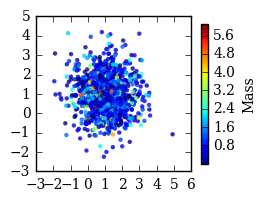

In [553]:
np.random.seed(42)
coordinates = np.random.normal(1,1,(1000,3))
masses      = np.random.exponential(1,1000)

pl.figure(figsize=(2.5,2))
pl.scatter(coordinates[:,0],coordinates[:,1],c=masses,s=10,edgecolor='None',alpha=0.8)
pl.colorbar(shrink=0.9,label='Mass');

Your package should be importable, and offer the three functions listed below (feel free to vary the arguments and return values, or add extra functions, as long as they get the job done).

The following sketch assumes the package is called `pyparticle`, but choose your own name!

* **`pyparticle.radii(coordinates,centre)`** : takes an array of 2D or 3D coordinates (it should work for both) and returns the radii of those points from the coordinate `centre`. 

* **`pyparticle.density_profile(radii,bins,mass=mass)`** : takes an array of radii from some centre and (optionally) an array of masses, and computes the density (either number density or mass density) in radial shells (`bins`). The values returned by the function, e.g. `bin_edges` and `density`, should be such that you can do `plot(bin_edges[:-1],density` to show the profile, as you would for the values returned by `np.histogram`.

* **`pyparticle.percentile_radius(radii,percentile,mass=mass)`** : takes the radii and (optionally) masses and returns the radius that encloses a given percentage of the particles. For example, the radius that encloses 50% of the particles, or 50% of the mass.

* **`pyparticle.r_nth_nearest(coordinates,n)`** : takes an array of coordinates and an integer n, and returns the distance to the n'th nearest neighbour of each particle. This distance is one way of estimating the local density around each particle.

You should write some examples to demonstrate how your package works (assume at least 10000 particles), and that it works as expected. 

Concentrate on making these functions work. If you want you *can* include classes and sophisticated error handling with exceptions, but you certainly don't need them!

## 8.2 Fitting

Using what you've learned in the Statistics course regarding the best way to fit a straight line to data with errors to fit, fit a straight line to this data. Notice that this plot uses the `errorbar` function, which is pretty easy to understand.

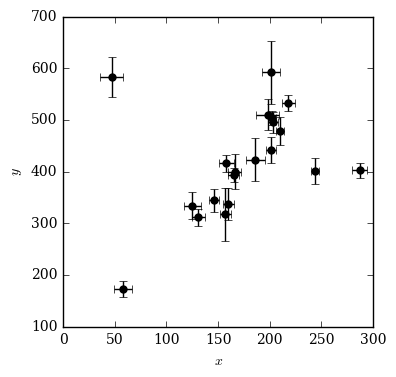

In [631]:
# Show the example data from Hogg et al.
data = np.load('line_data.npz')['arr_0']

pl.figure(figsize=(4,4))
pl.errorbar(data['x'],data['y'],xerr=data['sigma_x'],yerr=data['sigma_y'],
            marker='o',linestyle='None',c='k',markeredgecolor='None')
pl.xlabel('$x$')
pl.ylabel('$y$');

## 8.3 Fancy 2D Histogram

Using what you learned in this week's `matplotlib` section, write a routine `fancy_dotplot(xyz,projection=0)` that takes a 3D array of coordinates and makes something like the scatter plot below by projecting the coordinates along one of the axes (given as an optional argument). The histograms on the side show the density projected along each coordinate axis, while in the background to the scatter plot, the colour scale image shows the density of points along the projected axis (with the same xy bin spacing as the histograms on the sides).

As an extension, add a simple way to vary the properties of the dots, the histograms and the colour image by passing optional dictionary arguments for each, keeping the same defaults if nothing is passed (you might need to have a look at the note on catch-all arguments in the 'appendix' to this session below.

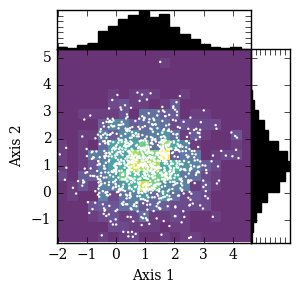

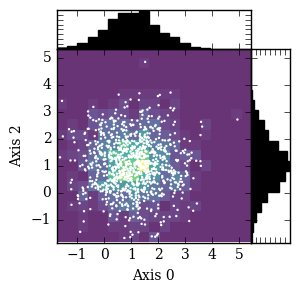

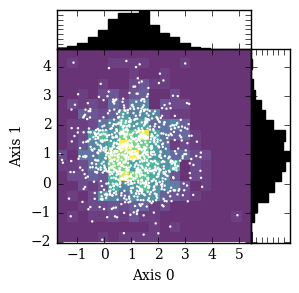

In [629]:
import matplotlib.gridspec as gs 

def fancy_dotplot(xyz,project_axis=0):
    """
    """
    f = pl.figure(figsize=(3,3))

    iproj = [0,1,2]
    iproj.remove(project_axis)
    ix,iy = iproj
   
    nrow, ncol = 2,2
    gs         = gridspec.GridSpec(nrow,ncol,
                                   wspace=0.0,hspace=0.0,
                                   height_ratios=(0.2,1),
                                   width_ratios=(1,0.2))

    x, y = xyz[:,ix],xyz[:,iy]
    xmin = 0.90*x.min()
    xmax = 1.10*x.max()
    ymin = 0.90*y.min()
    ymax = 1.10*y.max()

    # Main plot
    irow,icol = 1,0
    main_ax = pl.subplot(gs[irow,icol])
    main_ax.scatter(x,y,s=3,edgecolor='None',c='w')
    pl.hist2d(x,y,
              bins=(np.linspace(xmin,xmax,20),np.linspace(ymin,ymax,20)),
              cmap='viridis',alpha=0.8)
    pl.xlim(xmin,xmax)
    pl.ylim(ymin,ymax)
    
    irow,icol = 0,0
    ax = pl.subplot(gs[irow,icol])
    ax.hist(x,bins=np.linspace(xmin,xmax,20),color='k')
    pl.setp(ax.get_xticklabels(),visible=False)
    pl.setp(ax.get_yticklabels(),visible=False)
    pl.xlim(xmin,xmax)
    
    irow,icol = 1,1
    ax = pl.subplot(gs[irow,icol])
    ax.hist(y,bins=np.linspace(ymin,ymax,20),orientation='horizontal',color='k')
    pl.setp(ax.get_xticklabels(),visible=False)
    pl.setp(ax.get_yticklabels(),visible=False)
    pl.ylim(ymin,ymax)
    
    pl.sca(main_ax)
    
    # Trim the tick labels from the end of each axis
    pl.setp(main_ax.get_xticklabels()[0],visible=False)
    pl.setp(main_ax.get_xticklabels()[-1],visible=False)
    pl.setp(main_ax.get_yticklabels()[0],visible=False)
    pl.setp(main_ax.get_yticklabels()[-1],visible=False)
    
    pl.xlabel('Axis %d'%(ix))
    pl.ylabel('Axis %d'%(iy))
    
    return

# Run the plot
np.random.seed(42)
coordinates = np.random.normal(1,1,(1000,3))
fancy_dotplot(coordinates,0)
fancy_dotplot(coordinates,1)
fancy_dotplot(coordinates,2)

## Matching values in huge arrays of integers

At the end of the `numpy` section above, I introduced the `searchsorted` function to do bisection searches on sorted arrays. The point of this challenge is to put that to use.

Write a function `match` that takes two integer arrays, `A` and `B`, and returns an array `M` of the same length as `A` that contains, for each element in `A`, the index of the element with the same value in `B`. If no match is found in `B`, the corresponding element of `M` should be `-1`. You can assume that values in `B` are unique.

Demonstrate that your function works to match values (and detect non-matches) in an array `B` of size 100000 (you'll need to generate a unique array of 100000 integers to do that test).

Use the `time` (or `%timeit`) functions to compare the performance of your `match` to a loop using `np.where` to match each item, for different combinations of `A` and `B` sizes.

This is not an easy challenge!

# 9. Next week

- IO formats for large numerical datasets: HDF5 and Fortran binary files.
- A few more functions from astropy
- Healpix
- AstroML

# 10. Appendix

These are few less important topics that were either partly covered last week or didn't fit in anywhere else.

## 10.1 Making your own Python packages

We covered some of this last week.

As well as developing packages for specific projects, I find it useful to have a package to collect together various miscellaneous bits of simple code that I use in many different places. I have a package (which I've called `apcpy`) that has code to do things with plots, code to sort lists, code to read particles from Gadget simulation files, code to compute things for NFW profiles etc. etc. 

This package lives in `\home\andrew\code\python\apcpy`, so it can be imported from anywhere as long as `\home\andrew\code\python` ends up in `sys.path` (which I ensure by including that directory in my `PYTHONPATH`, using `.bashrc`).

Remember that to make a package, you just need a directory containing some python files and an `__init__.py` file, which can be empty.

## 10.2 Implicit lists of arguments and sets of keyword arguments

You'll often see this in Python code, but we didn't cover it last week. As well as explicit definitions of function arguments, you can also ask Python functions to 'grab' any other arguments that get passed to the function using `*args` and `**kwargs`.

In [129]:
def func(a,b,c,an_option=0,*args,**kwargs):
    """
    """
    print('Regular arguments {} {} {}'.format(a,b,c))
    
    print('Regular argument with default: an_option = {}'.format(an_option))
    
    if len(args) > 0:
        print('args is a tuple that holds the remaining non-keyword arguments: {}'.format(args))
    
    for k,v in kwargs.iteritems():
        print('kwargs is a dict that holds keyword arguments: {} = {}'.format(k,v))

`*args` captures any non-keyword arguments after the mandatory ones (in this case a,b,c) and those with defaults (`an_option` here). They are stored in a tuple called `args`.

`**kwargs` captures any **keyword arguments** after those you've defined, and stores them in a dictionary called `kwargs`.

In [130]:
func(1,2,3,5,6,7,8,alpha=1,beta=2)

Regular arguments 1 2 3
Regular argument with default: an_option = 5
args is a tuple that holds the remaining non-keyword arguments: (6, 7, 8)
kwargs is a dict that holds keyword arguments: alpha = 1
kwargs is a dict that holds keyword arguments: beta = 2


This is useful if you want to 'pass on' arguments from one function to another that it calls. If you refer to `args` with `*args` inside the function, the arguments in `args` will be treated as if you'd typed them out one by one with a comma between them (if you use `args` without the `*`, as in the cells above, then it will be treated as a tuple). A similar logic applies to `**kwargs`.

Here's a simple example that provides a more complicated version of the standard `matplotlib` `plot` routine.

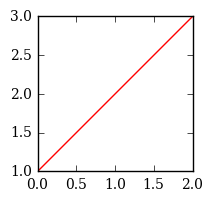

In [232]:
def plot_on_a_figure_of_some_size(xsize,ysize,*args,**kwargs):
    pl.figure(figsize=(xsize,ysize))
    pl.plot(*args,**kwargs)
    pl.show()

plot_on_a_figure_of_some_size(2,2,[1,2,3],c='r')

We pass all the arguments (after the first two) and all the keywords through to the plot routine, so we don't have to worry about copying the many arguments of `plot` one by one.

This has lots of other uses.

## 10.3 Broadcasting

Broadcasting is the name for the set of rules that govern what happens when you ask functions in `numpy` to carry out operations that combine arrays with different shapes. Here are three attempts to explain that (all these explanations are quite long, no need to read them right now):

http://www.scipy-lectures.org/intro/numpy/operations.html#broadcasting

https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

http://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc

As those links show, the rules for broadcasting and the 'tricks' you can do by understanding them are a deep and complicated topic. You'll need to have some appreciation of broadcasting, if you want do non-trivial maths with multidimensional arrays. If not, then most problems with incompatible shapes of arrays can be fixed by checking the `shape` and dimensionality of your array and use of `np.atleast_1d`, `np.atleast_2d` and `np.transpose` (or `array.T`).